## SNU PPSML 4차 정규과제 [10/19(금) 24:00 마감]

In [0]:
# Printing all outputs in a cell (not only the last output)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

----
### ** Central Limit Theorem (중심극한정리) [160pt] **

> 각각 유한한 평균($\mu_i$)과 분산($\sigma_i^2$)을 갖는 **임의의** 모확률분포 $p_{i=1..n}(x)$가 있다고 하자.  
이때 각각 $p_i(x)$를 따르는 n개의 독립적인 확률변수 (random variable) $x_1, ..., x_n$ 뽑아서, 그 합을 $X=\sum_{i=1}^{n} x_i$이라 하면,
이러한 방식으로 조합한 확률변수 $X$의 확률분포는, $n\rightarrow \infty$ 일 때, 평균이 $\mu_{X}=\sum_{i=1}^{n} \mu_i$ 이고 분산이 $\sigma_{X}^{2}=\sum_{i=1..n}\sigma_i^2$ 인 **가우시안 확률분포(정규확률분포) $G(\mu_X,\sigma_X^2)$ **에 점근한다.

동일한 상황에서 이를 합 대신 표본평균 $\bar{X}\equiv \frac{X}{n}$에 적용하면, 표본평균 $\bar{X}$의 확률분포는 평균이 $\mu_{\bar{X}}=\frac{\sum_{i=1}^n \mu_i}{n}$ 이고 분산이 $\sigma_{\bar{X}}^{2}=\frac{\sum_{i=1..n}\sigma_i^2}{n^2}$인 정규확률분포에 점근하게 되고, 
특히 평균이 $\mu$이고 분산이 $\sigma$인, **임의의 한 종류**의 모확률분포 $p_i(x)=p(x)$로부터 독립적인 $n$개의 확률변수를 취한 표본평균 $\bar{X}$은, 역시 $n\rightarrow\infty$ 일 때, 평균이 $\mu_{\bar{X}}=\mu$이고 분산이 $\sigma_{\bar{X}}^2=\frac{\sigma^2}{n}$인 정규확률분포에 점근하게된다.  

이것이 확률론에서 가장 놀라운 결과의 하나로 여겨지는 중심극한정리(Central Limit Theorem)이다.

간단히 말하자면 서로 독립적인 확률변수의 합이 근사적으로 정규분포를 따르게 된다는 것이며, 이를 통하여 우리가 자연계에서 관찰하는 각기 다른 확률분포를 갖는 수많은 모집단으로부터 조합한 데이터들 역시 특정한 정규분포를 나타내게 된다는 매우 놀라운 현상을 설명할 수 있으며, 이는 측정의 정확도를 계산하는 데 있어 이론적인 바탕이 된다.

---

**1. 표본을 취하는 모집단의 모분포함수 $p_{i=1..n}(x)=p(x)$ 가 다음과 같은 확률을 따를때, 표본의 크기($n$)가 커짐에 따라서 표본평균($\bar{X}$)의 분포가 정규확률분포에 점근함을 직접 프로그래밍을 통하여 시연해보고, 이를 통하여 중심극한정리를 체험해보자. (Python Numpy와 matplotlib & numpy.random.randint() 
활용가능) ** [40pt]

> $p(x) =
\begin{cases}
0.5&\,\text{for}\,\, x = 0\\
0.5&\,\text{for}\,\, x = 1
\end{cases}
$

<Figure size 432x288 with 0 Axes>

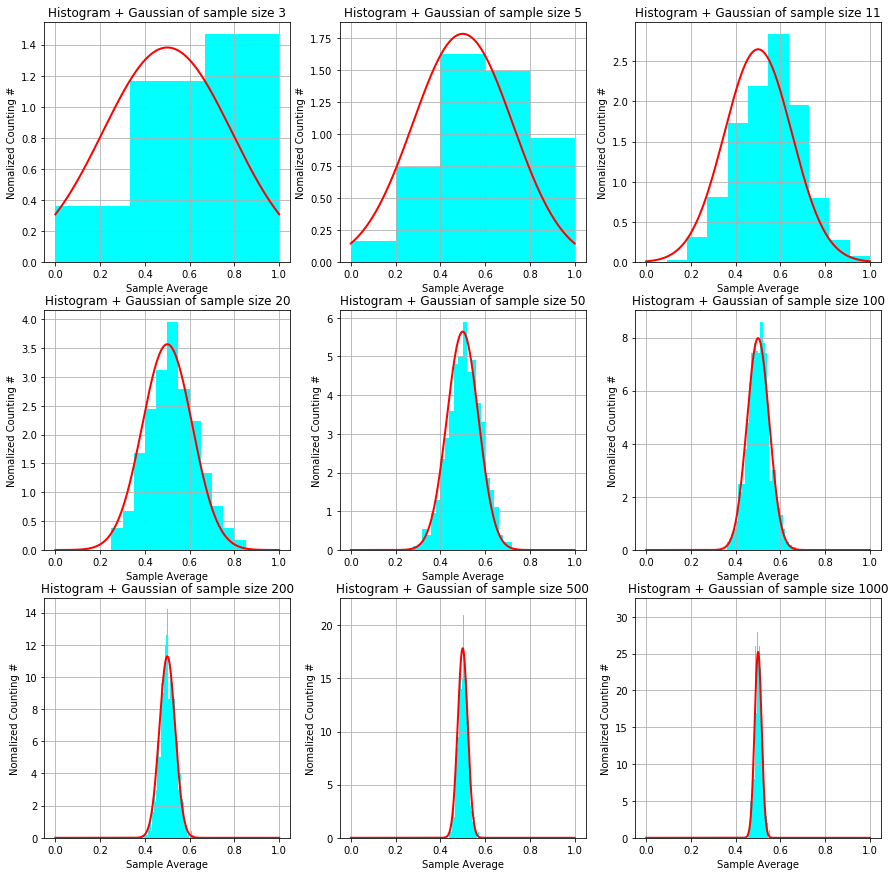

In [35]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt #pyplot 를 plt 로 가져오기

#문제 조건을 만족시키는 확률변수들을 가지는 랜덤한 표본평균들을 m개 만드는 함수
def make_sa(m,n):
    array = [0 for i in range(m)]

    for i in range(m):
        rv = np.random.choice(2, n, p=[0.5, 0.5]) #random variables
        x = 0. #표본평균
        for j in range(0,n):
            x += rv[j]
        x /= n
        array[i] = x
    return array

#Gaussian function for comparison
def gaussian_func(x,u,sb):
    return 1./(sb*math.sqrt(2.*math.pi))*math.exp(-(x-u)**2/(2.*sb**2))

m = 1000  #표본집단의 갯수
n = [3,5,11,20,50,100,200,500,1000]   #표본의 원소의 갯수
x1= []    #x-axis histogram linespaces
x2= []    #x-axis gaussian linespaces 
y = []    #y-axis values(real gaussian function values)
for i in range(9):
    x1.append([j/n[i] for j in range(n[i]+1)])
    x2.append([j/m for j in range(m+1)])
    y.append([gaussian_func(k,0.5,0.5/math.sqrt(n[i])) for k in x2[i]])  #average = 0.5, sigma = 0.5/sqrt(n)

sa = []  #Array of Sample Averages array
for i in range(9):
    sa.append(make_sa(m,n[i]))
        
def draw_hist_and_graph(ax,x,sa,x1,y,num):
    ax.hist(sa,x,color='cyan',density = 1)
    ax.plot(x1,y,linewidth=2.0,color='r')
    ax.set_xlabel('Sample Average')
    ax.set_ylabel('Nomalized Counting #')
    ax.set_title('Histogram + Gaussian of sample size ' + str(num))
    ax.grid(True)
    
fig = plt.figure()
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for i in range(3):
    for j in range(3):
        draw_hist_and_graph(axes[i][j],x1[3*i+j],sa[3*i+j],x2[3*i+j],y[3*i+j],n[3*i+j])

---
** 2. 표본을 취하는 모집단의 모분포함수가 다음과 같은 푸아송(Poisson) 분포를 따를때, 표본의 크기($n$)가 커짐에 따라서 표본평균($\bar{X}$)의 분포가 정규확률분포에 점근함을 직접 프로그래밍을 통하여 시연해보고, 이를 통하여 중심극한정리를 또한번 체험해보자. (Python Numpy, matplotlib & numpy.random.poisson()함수 활용가능) ** [40pt]

> $p(k;\lambda) = e^{-\lambda} \frac{\lambda^k}{k!}$  
- 의미: $\lambda$ 번의 독립적인 사건 발생이 예상될 때, $k$번이 발생할 확률.  
- 푸아송 분포에서는 평균($\mu$)=분산($\sigma^2$)=$\lambda$인 관계가 성립한다.


<Figure size 432x288 with 0 Axes>

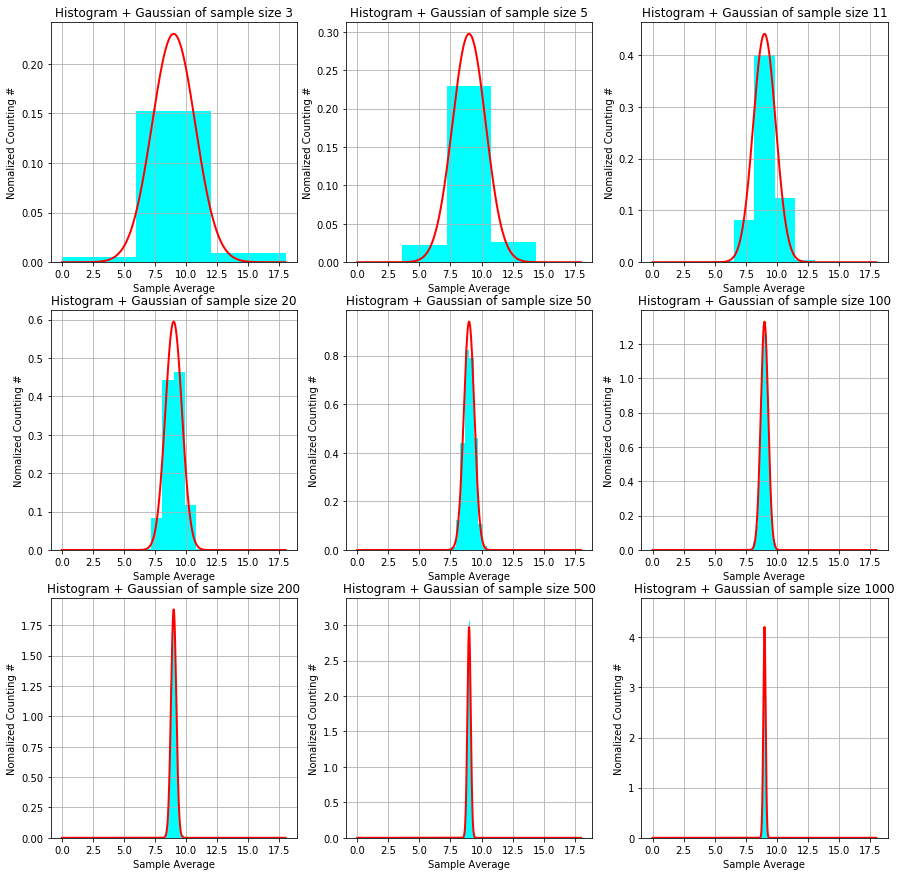

In [36]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt #pyplot 를 plt 로 가져오기


#문제 조건을 만족시키는 확률변수들을 가지는 랜덤한 표본평균들을 m개 만드는 함수
def make_sa(m,n):
    array = [0 for i in range(m)]

    for i in range(m):
        rv = np.random.poisson(lam=9,size=n) #poisson distribution random variables('lambda = 9'인 케이스만 다룸)
        x = 0. #표본평균
        for j in range(0,n):
            x += rv[j]
        x /= n
        array[i] = x
    return array

#Gaussian function for comparison
def gaussian_func(x,u,sb):
    return 1./(sb*math.sqrt(2.*math.pi))*math.exp(-(x-u)**2/(2.*sb**2))

m = 1000  #표본집단의 갯수
n = [3,5,11,20,50,100,200,500,1000]   #표본의 원소의 갯수
x1= []    #x-axis histogram linespaces
x2= []    #x-axis gaussian linespaces 
y = []    #y-axis values(real gaussian function values)
for i in range(9):
    x1.append([18*j/n[i] for j in range(n[i]+1)])
    x2.append([18*j/m for j in range(m+1)])
    y.append([gaussian_func(k,9,3/math.sqrt(n[i])) for k in x2[i]])  #average = lambda = 9, sigma = 3/sqrt(n)

sa = []   #sample average array
for i in range(9):
    sa.append(make_sa(m,n[i]))
    
def draw_hist_and_graph(ax,x,sa,x1,y,num):
    ax.hist(sa,x,color='cyan',density = 1)
    ax.plot(x1,y,linewidth=2.0,color='r')
    ax.set_xlabel('Sample Average')
    ax.set_ylabel('Nomalized Counting #')
    ax.set_title('Histogram + Gaussian of sample size ' + str(num))
    ax.grid(True)
    
fig = plt.figure()
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for i in range(3):
    for j in range(3):
        draw_hist_and_graph(axes[i][j],x1[3*i+j],sa[3*i+j],x2[3*i+j],y[3*i+j],n[3*i+j])

---
** 3. 표본을 취하는 모집단의 모분포함수가 다음과 같은 (임의의 사용자정의) 함수분포를 따를때, 역시 표본의 크기($n$)가 커짐에 따라서 표본평균($\bar{X}$)의 분포가 정규확률분포에 점근하는 중심극한정리를 프로그래밍을 통하여 시연해보자 (Python Numpy, matplotlib 등등 라이브러리 활용가능) ** [80pt]

> $
p(x) = 
\begin{cases}
3x^2&\,\, \text{for}&\,\, 0<x<1\\ 
0&\,\, \text{for}&\,\, \text{others}
\end{cases}
$

---

**3-1) 임의의 사용자정의 함수분포를 따르는 확률변수(random variable)을 발생시키는 파이썬 함수를 작성하여, 위에 정의된 분포함수를 따르는 난수를 발생시켜보자. **[40pt]

Text(0.5,1,'Histogram of rand_num generator + p(x) graph')

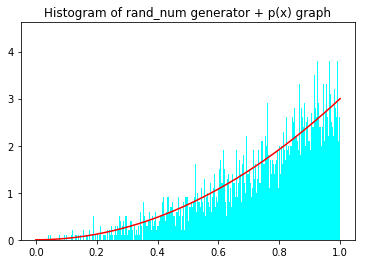

In [67]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt #pyplot 를 plt 로 가져오기

def make_rand(n):
    result = []
    x = np.random.rand(n)                 #uniform random number 0~1
    for i in range(n):
        result.append(math.pow(x[i],1/3.))    # x = P^-1(x) -> x = y^(1/3)
    return result

array = make_rand(10000)
x = [i/1000 for i in range(1001)]
y = [3*k**2 for k in x]

f = plt.figure()
plt.hist(array,x,density=1,color='cyan')
plt.plot(x,y,color='r')
plt.title('Histogram of rand_num generator + p(x) graph')

---

** 3-2) 작성한 난수발생기를 활용하여 중심극한정리를 마지막으로 시연해보자.** [40pt]

<Figure size 432x288 with 0 Axes>

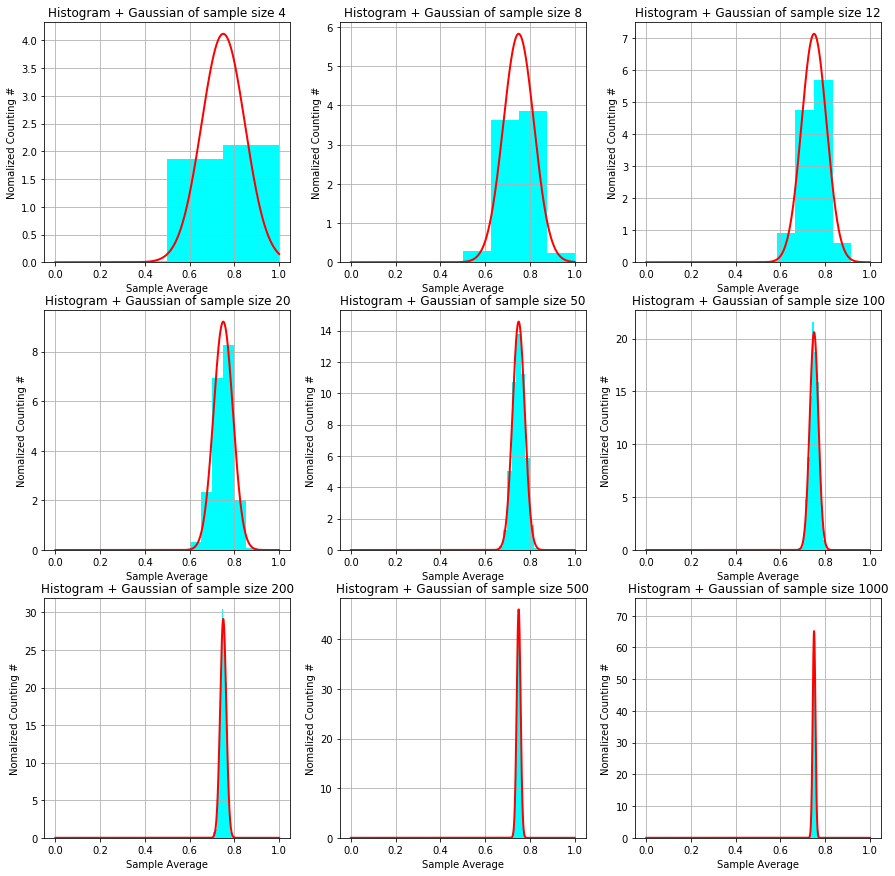

In [68]:
#문제 조건을 만족시키는 확률변수들을 가지는 랜덤한 표본평균들을 m개 만드는 함수
def make_sa(m,n):
    array = [0 for i in range(m)]

    for i in range(m):
        rv = make_rand(n) #random variables
        x = 0. #표본평균
        for j in range(0,n):
            x += rv[j]
        x /= n
        array[i] = x
    return array

#Gaussian function for comparison
def gaussian_func(x,u,sb):
    return 1./(sb*math.sqrt(2.*math.pi))*math.exp(-(x-u)**2/(2.*sb**2))

m = 1000  #표본집단의 갯수
n = [4,8,12,20,50,100,200,500,1000]   #표본의 원소의 갯수
x1= []    #x-axis histogram linespaces
x2= []    #x-axis gaussian linespaces 
y = []    #y-axis values(real gaussian function values)
for i in range(9):
    x1.append([j/n[i] for j in range(n[i]+1)])
    x2.append([j/m for j in range(m+1)])
    y.append([gaussian_func(k,0.75,math.sqrt(3/n[i]/80)) for k in x2[i]])  #average = 0.75, sigma = sqrt(3/(80*n))

sa = []  #Array of Sample Averages array
for i in range(9):
    sa.append(make_sa(m,n[i]))

#그래프 그리기 매크로
def draw_hist_and_graph(ax,x,sa,x1,y,num):
    ax.hist(sa,x,color='cyan',density = 1)
    ax.plot(x1,y,linewidth=2.0,color='r')
    ax.set_xlabel('Sample Average')
    ax.set_ylabel('Nomalized Counting #')
    ax.set_title('Histogram + Gaussian of sample size ' + str(num))
    ax.grid(True)
    
fig = plt.figure()
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for i in range(3):
    for j in range(3):
        draw_hist_and_graph(axes[i][j],x1[3*i+j],sa[3*i+j],x2[3*i+j],y[3*i+j],n[3*i+j])